# EDA and Visualisation of Wearable Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/wearable_users_raw_data.csv")

In [3]:
#didn't include calorie intake as he said people barely inputted
wearableData = df[['Steps','Sleep', 'HRV', 'Sleep Heart Rate', 'Glucose', 'Callories Burn','Calories Intake']]
nan_percentage = wearableData.isna().mean() * 100
nan_percentage

Steps               49.650350
Sleep               51.182151
HRV                 50.482850
Sleep Heart Rate    54.279054
Glucose             79.054279
Callories Burn      48.551449
Calories Intake     82.217782
dtype: float64

In [4]:
#not including glucose, calorie intake- not much data
#wearable columns not in full data
df_full = pd.read_csv("data/wearable_users_raw_data.csv")
filtered_df = df_full[df_full[['Steps','Sleep', 'HRV',	'Sleep Heart Rate',	'Callories Burn']].notna().any(axis=1)]
filtered_df

,User ID,Phone,Gender,Age,Weight,Height,Date/Time,Tiredness,Calm,Nutrition,...,Actions,With,Reflections,Steps,Sleep,HRV,Sleep Heart Rate,Glucose,Callories Burn,Calories Intake
105,XGT26N1QatgJQ7jCrGZDKwwhYjJ2,447873729052,woman,19,65,166,2024-03-04T10:29:57.848Z,7.0,3.0,9.0,...,Study,Friends,NaN,17074.0,33300.0,89.0,43.0,NaN,3400.0,NaN
106,XGT26N1QatgJQ7jCrGZDKwwhYjJ2,447873729052,woman,19,65,166,2024-03-05T09:30:27.512Z,8.0,3.0,9.0,...,Relaxing,Myself,NaN,879.0,29220.0,98.0,43.0,NaN,3155.0,NaN
107,XGT26N1QatgJQ7jCrGZDKwwhYjJ2,447873729052,woman,19,65,166,2024-03-05T15:11:40.326Z,4.0,8.0,6.0,...,Training+Study+Tea/Coffee,Friends+Myself,NaN,879.0,29220.0,98.0,43.0,NaN,3155.0,NaN
108,XGT26N1QatgJQ7jCrGZDKwwhYjJ2,447873729052,woman,19,65,166,2024-03-06T19:23:25.631Z,9.0,5.0,8.0,...,Training+Food+Socialising,Myself+Friends+My Team,NaN,3446.0,NaN,96.0,NaN,NaN,3798.0,NaN
109,XGT26N1QatgJQ7jCrGZDKwwhYjJ2,447873729052,woman,19,65,166,2024-03-07T09:34:41.837Z,9.0,1.0,6.0,...,Exam+Study,Myself,NaN,11896.0,24840.0,108.0,45.0,NaN,2112.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,sMGdHxYjhvTCGsGO6T39nPOu1Yk2,447964091225,woman,56,56,160,2025-03-19T07:20:41.000Z,70.0,40.0,70.0,...,Travel+Work,Myself,into London for a conference.,12314.0,25260.0,26.0,65.0,NaN,1891.0,NaN
2999,sMGdHxYjhvTCGsGO6T39nPOu1Yk2,447964091225,woman,56,56,160,2025-03-19T14:10:42.000Z,70.0,50.0,80.0,...,Work,Joly,NaN,12314.0,25260.0,26.0,65.0,NaN,1891.0,NaN
3000,sMGdHxYjhvTCGsGO6T39nPOu1Yk2,447964091225,woman,56,56,160,2025-03-20T07:00:00.000Z,50.0,60.0,70.0,...,Travel+Work,Myself,NaN,16382.0,27000.0,29.0,61.0,NaN,1996.0,NaN
3001,sMGdHxYjhvTCGsGO6T39nPOu1Yk2,447964091225,woman,56,56,160,2025-03-20T14:24:13.000Z,40.0,60.0,80.0,...,Work,Joly,NaN,16382.0,27000.0,29.0,61.0,NaN,1996.0,NaN


In [5]:
#num of data with at least one wearable value
num_instances = filtered_df.shape[0]
num_instances

1599

In [6]:
#num of data with at least one wearable value
num_instances = filtered_df.shape[0]
num_instances

#users that have data
users = filtered_df['User ID'].value_counts()
users

User ID
sMGdHxYjhvTCGsGO6T39nPOu1Yk2    1234
AVvBXPQCGvhJ1VYXZC16UETaFbz1     167
2N57YUL8awNjuVW7zj3HbKF19Ap2      63
XGT26N1QatgJQ7jCrGZDKwwhYjJ2      60
jp1UByteZQQFXcKwL8M77Akdh322      36
m22YNGrwu1Q9vpgLTn4LNkOOdHU2      25
OafBJdnAhLQQAKrdST6R3WWU1K73      14
Name: count, dtype: int64

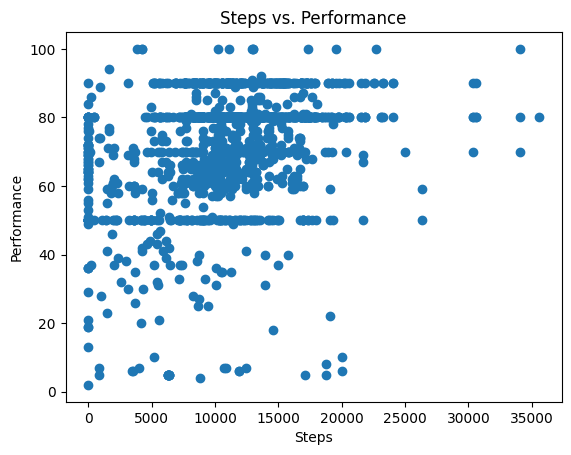

In [7]:
#total 7 users with wearable data
#shown above, most data is from a single user so can't predict the other 100+ users wearable data from mainly one user
#comapring performance against Steps


x_values = filtered_df['Steps']
y_values = filtered_df['Performance']

plt.scatter(x_values, y_values)

plt.xlabel("Steps")
plt.ylabel("Performance")
plt.title("Steps vs. Performance")
plt.show()


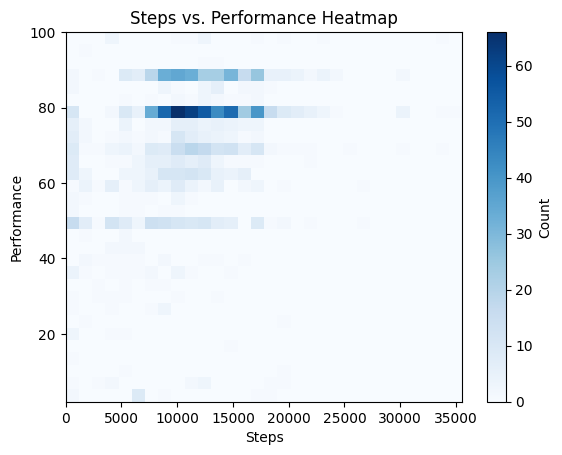

In [8]:
#drop rows with missing data
#creates histogram

#getting rid of na in column
column_df = filtered_df.dropna(subset=['Steps', 'Performance'])
x_values = column_df['Steps']
y_values = column_df['Performance']
plt.hist2d(x_values, y_values, bins=(30, 30), cmap='Blues')
plt.colorbar(label="Count")
plt.xlabel("Steps")
plt.ylabel("Performance")
plt.title("Steps vs. Performance Heatmap")
plt.show()

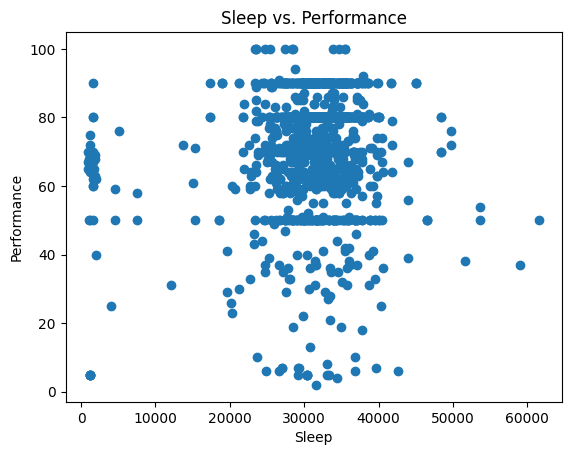

In [9]:
#testign sleep

x_values = filtered_df['Sleep']
y_values = filtered_df['Performance']

plt.scatter(x_values, y_values)

plt.xlabel("Sleep")
plt.ylabel("Performance")
plt.title("Sleep vs. Performance")
plt.show()

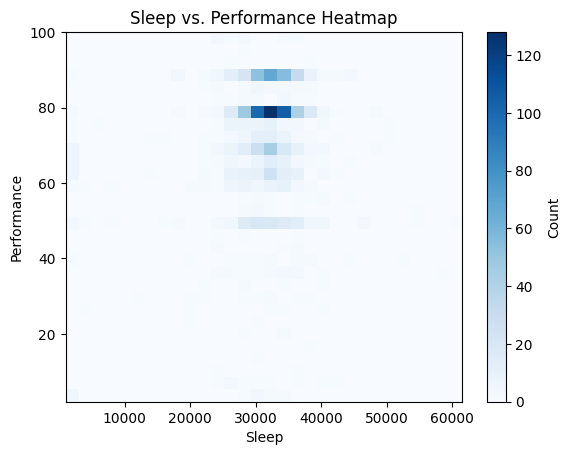

In [10]:
#histogram of sleep
#getting rid of na in column
column_df = filtered_df.dropna(subset=['Sleep', 'Performance'])
x_values = column_df['Sleep']
y_values = column_df['Performance']
plt.hist2d(x_values, y_values, bins=(30, 30), cmap='Blues')
plt.colorbar(label="Count")
plt.xlabel("Sleep")
plt.ylabel("Performance")
plt.title("Sleep vs. Performance Heatmap")
plt.show()

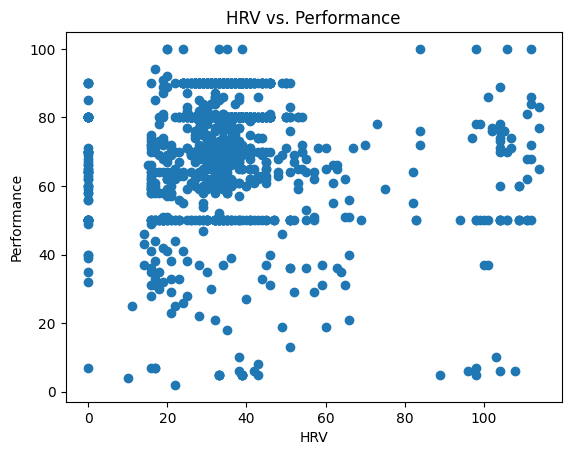

In [11]:
#scatter of HRV

x_values = filtered_df['HRV']
y_values = filtered_df['Performance']

plt.scatter(x_values, y_values)

plt.xlabel("HRV")
plt.ylabel("Performance")
plt.title("HRV vs. Performance")
plt.show()

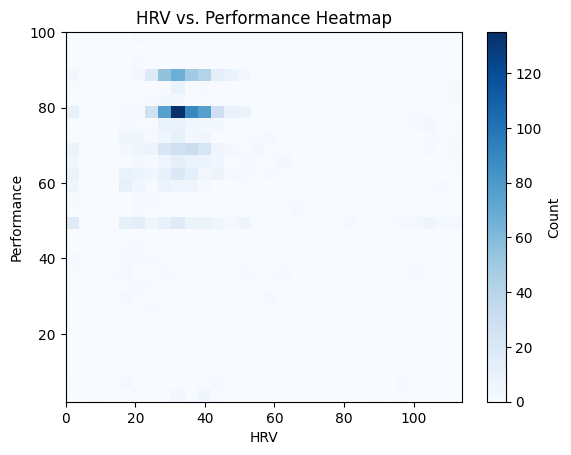

In [12]:
#histogram of HRV

#getting rid of na in column
column_df = filtered_df.dropna(subset=['HRV', 'Performance'])
x_values = column_df['HRV']
y_values = column_df['Performance']
plt.hist2d(x_values, y_values, bins=(30, 30), cmap='Blues')
plt.colorbar(label="Count")
plt.xlabel("HRV")
plt.ylabel("Performance")
plt.title("HRV vs. Performance Heatmap")
plt.show()

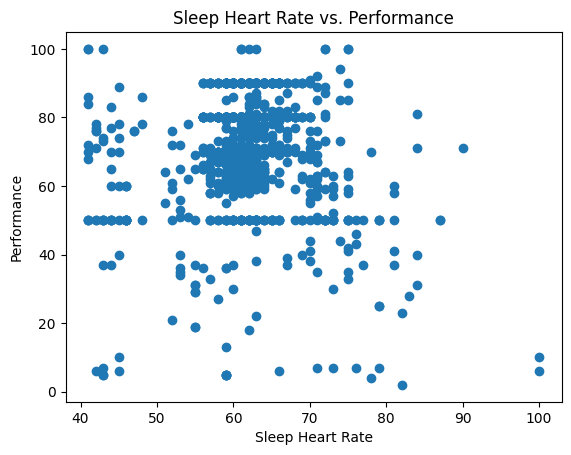

In [13]:
#scatter of Sleep Heart Rate

x_values = filtered_df['Sleep Heart Rate']
y_values = filtered_df['Performance']

plt.scatter(x_values, y_values)

plt.xlabel("Sleep Heart Rate")
plt.ylabel("Performance")
plt.title("Sleep Heart Rate vs. Performance")
plt.show()

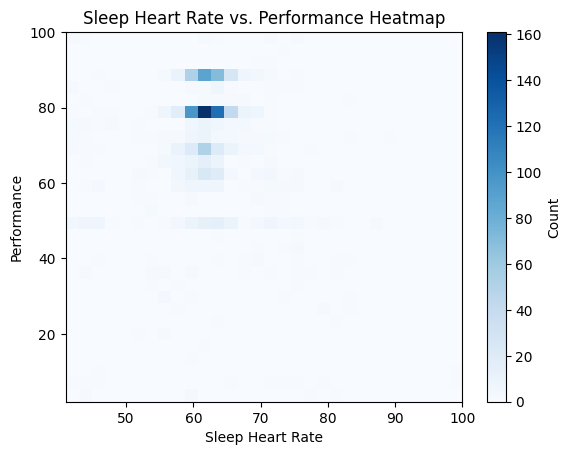

In [14]:
#histogram of Sleep Heart Rate

#getting rid of na in column
column_df = filtered_df.dropna(subset=['Sleep Heart Rate', 'Performance'])
x_values = column_df['Sleep Heart Rate']
y_values = column_df['Performance']
plt.hist2d(x_values, y_values, bins=(30, 30), cmap='Blues')
plt.colorbar(label="Count")
plt.xlabel("Sleep Heart Rate")
plt.ylabel("Performance")
plt.title("Sleep Heart Rate vs. Performance Heatmap")
plt.show()

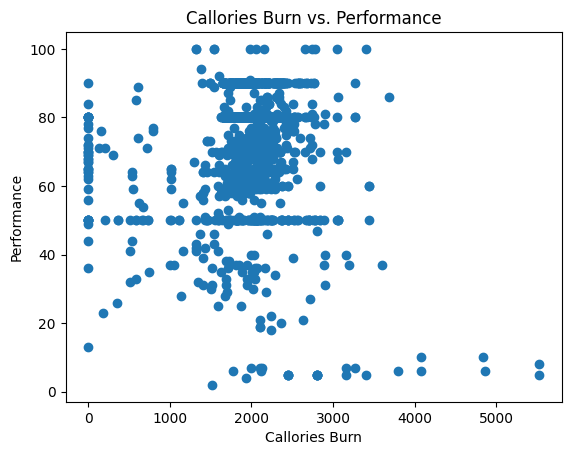

In [15]:
#scatter of Callories Burn

x_values = filtered_df['Callories Burn']
y_values = filtered_df['Performance']

plt.scatter(x_values, y_values)

plt.xlabel("Callories Burn")
plt.ylabel("Performance")
plt.title("Callories Burn vs. Performance")
plt.show()

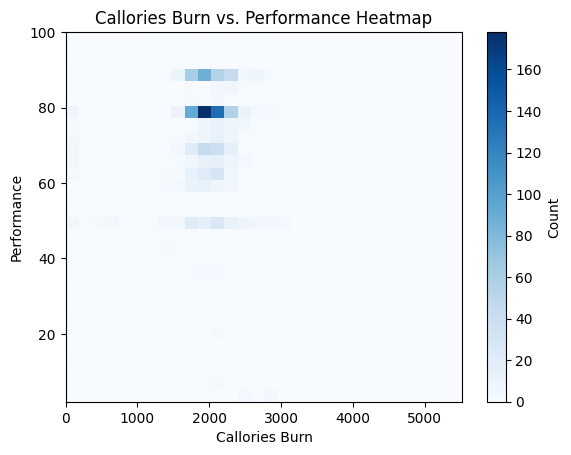

In [16]:
#histogram of Callories Burn

#getting rid of na in column
column_df = filtered_df.dropna(subset=['Callories Burn', 'Performance'])
x_values = column_df['Callories Burn']
y_values = column_df['Performance']
plt.hist2d(x_values, y_values, bins=(30, 30), cmap='Blues')
plt.colorbar(label="Count")
plt.xlabel("Callories Burn")
plt.ylabel("Performance")
plt.title("Callories Burn vs. Performance Heatmap")
plt.show()

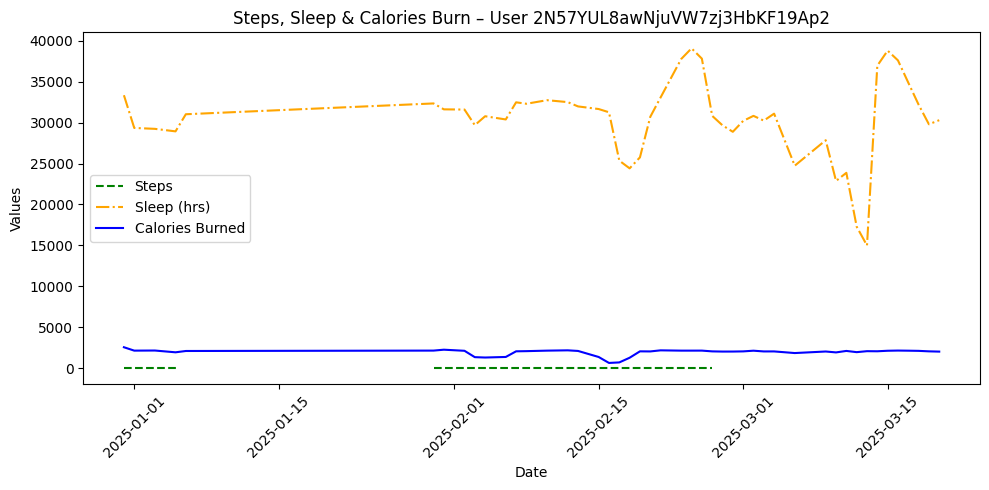

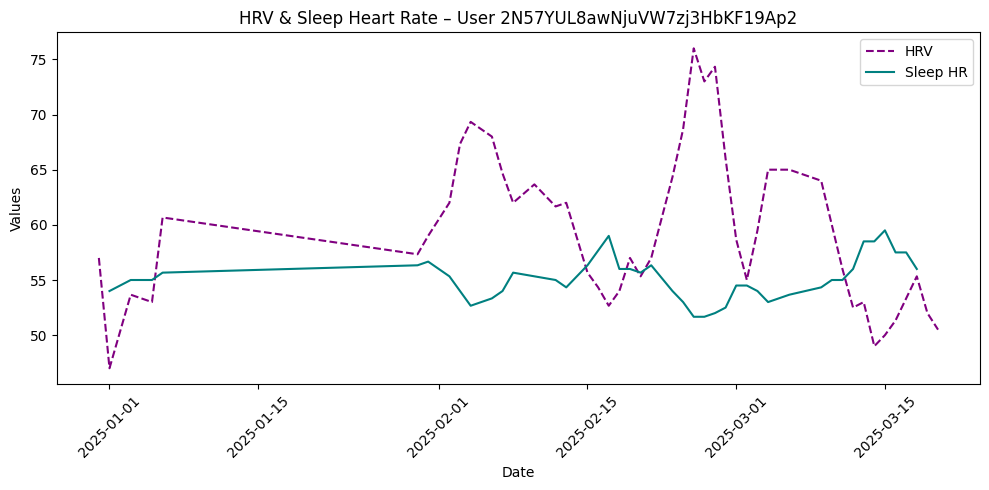

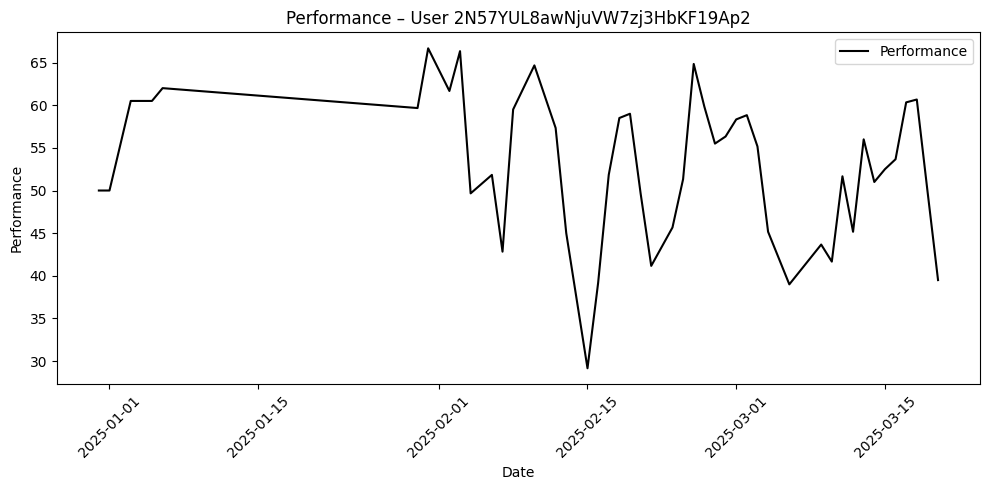

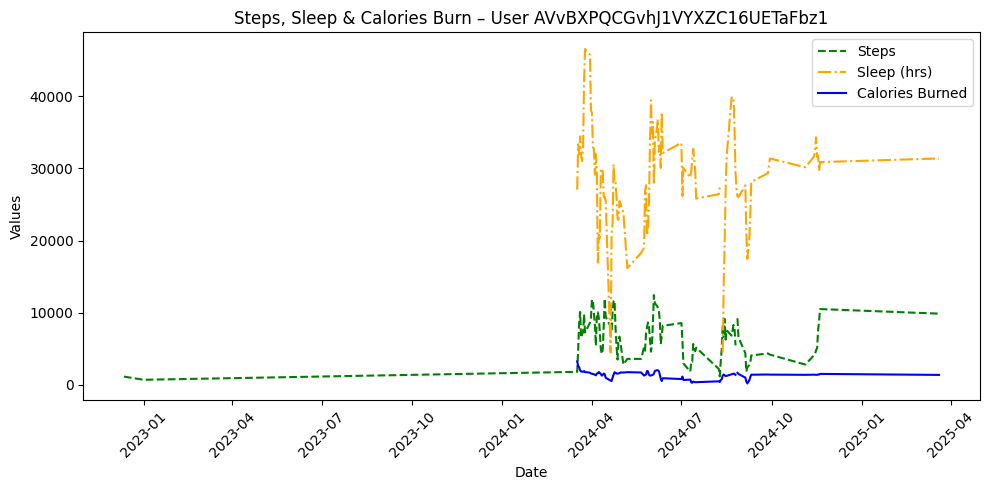

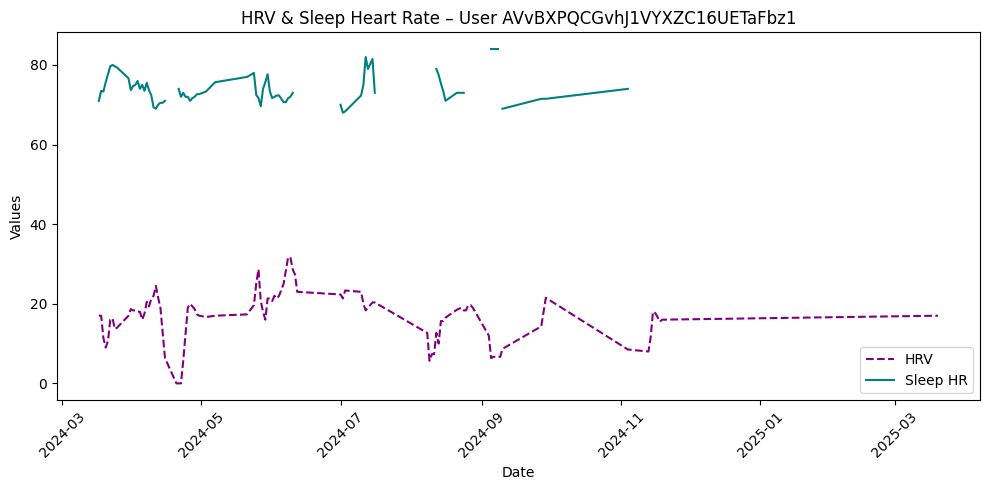

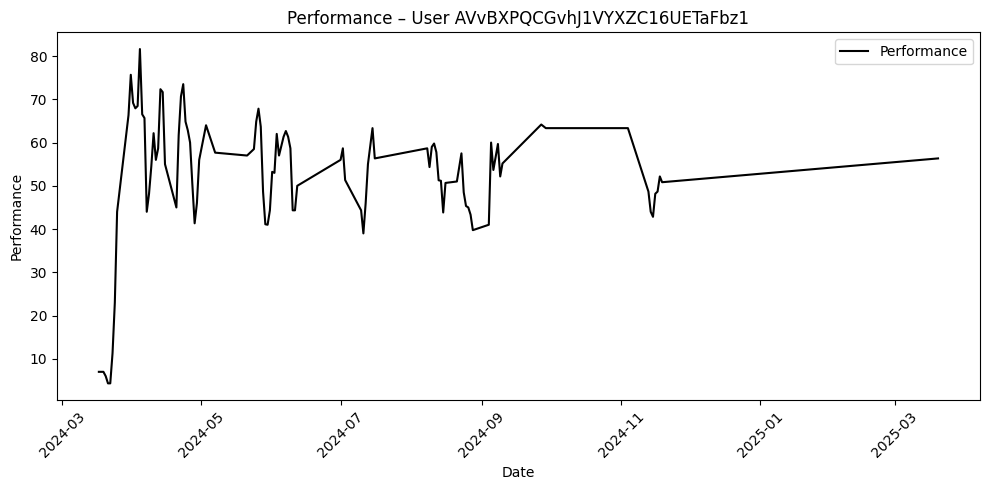

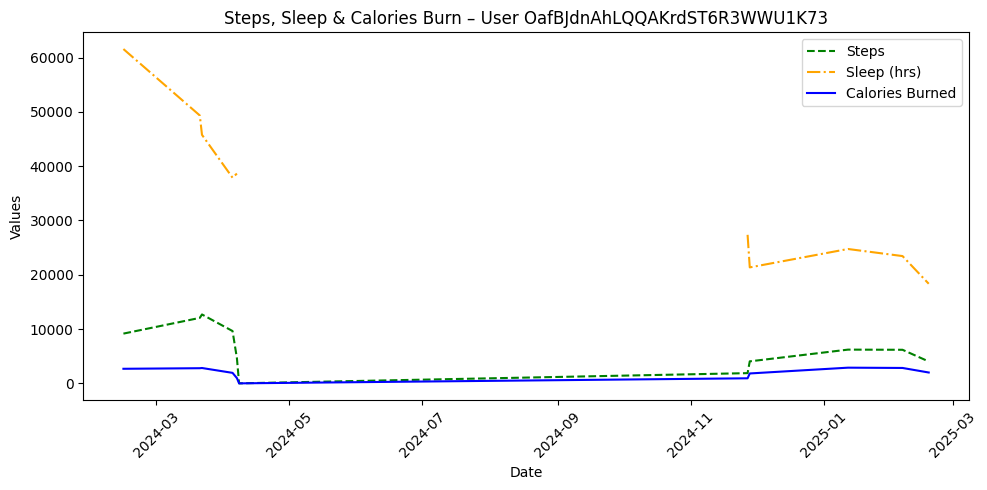

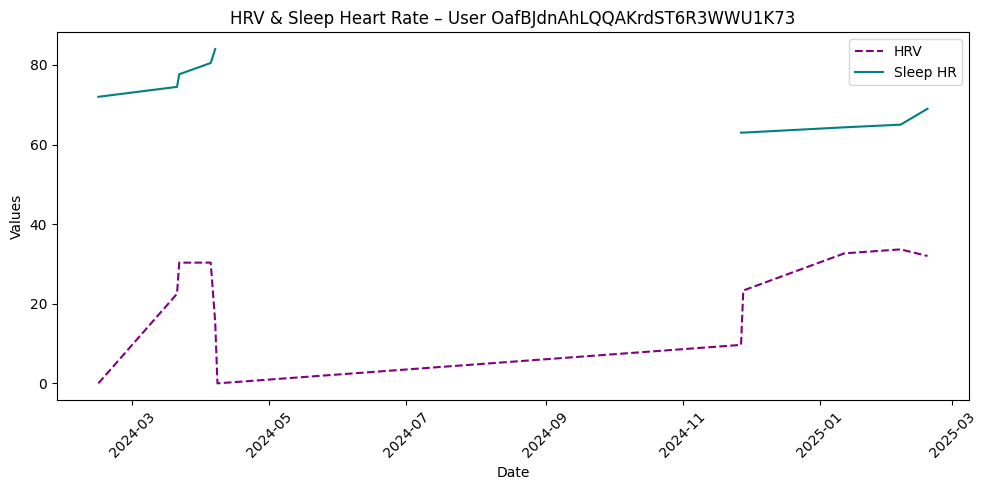

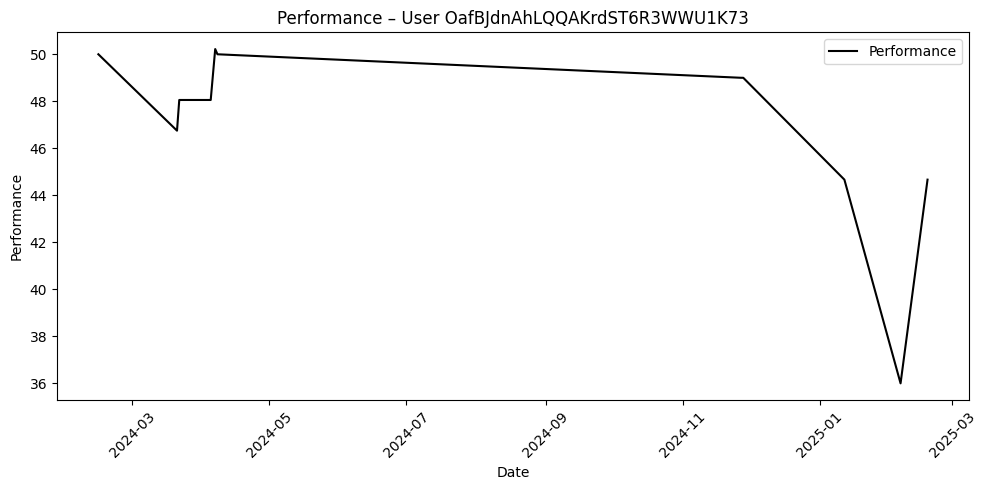

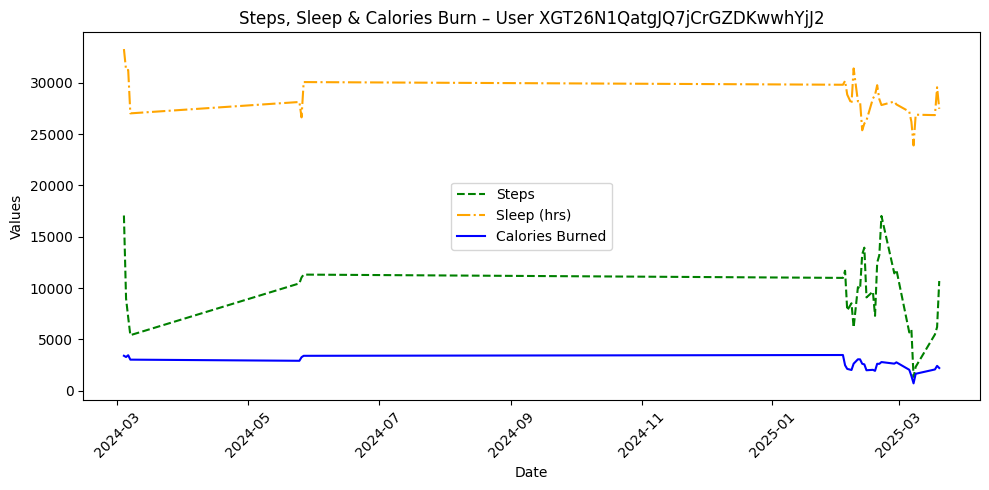

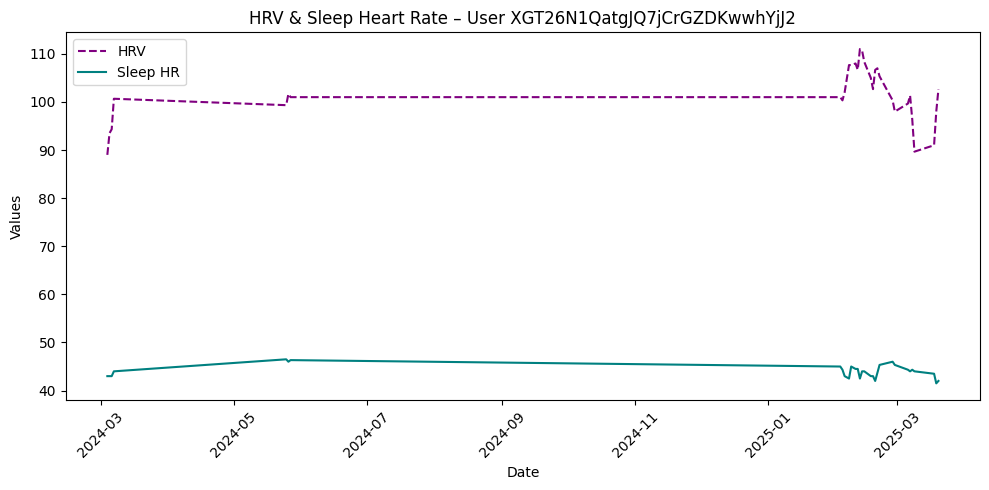

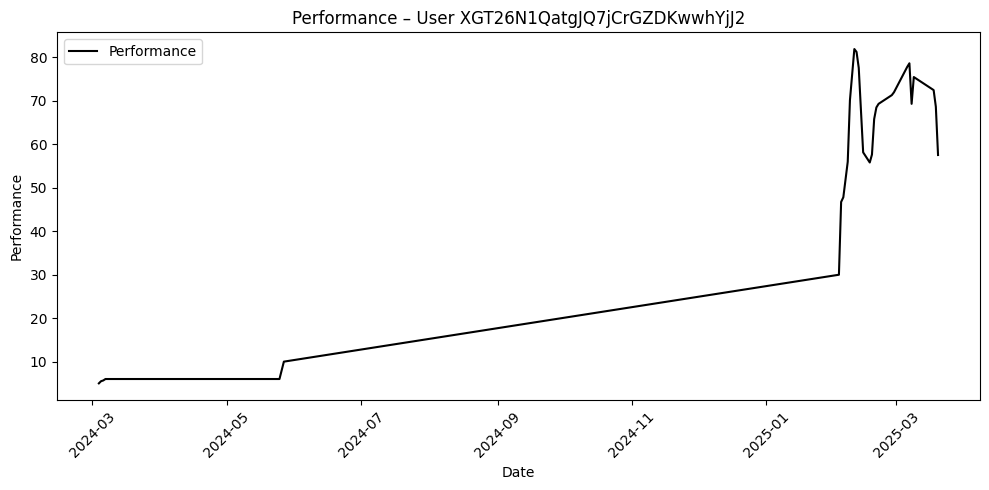

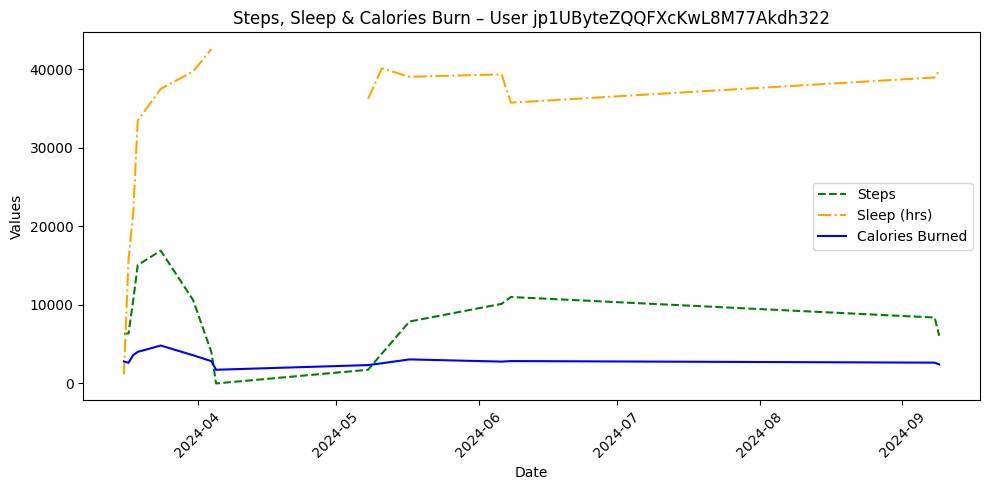

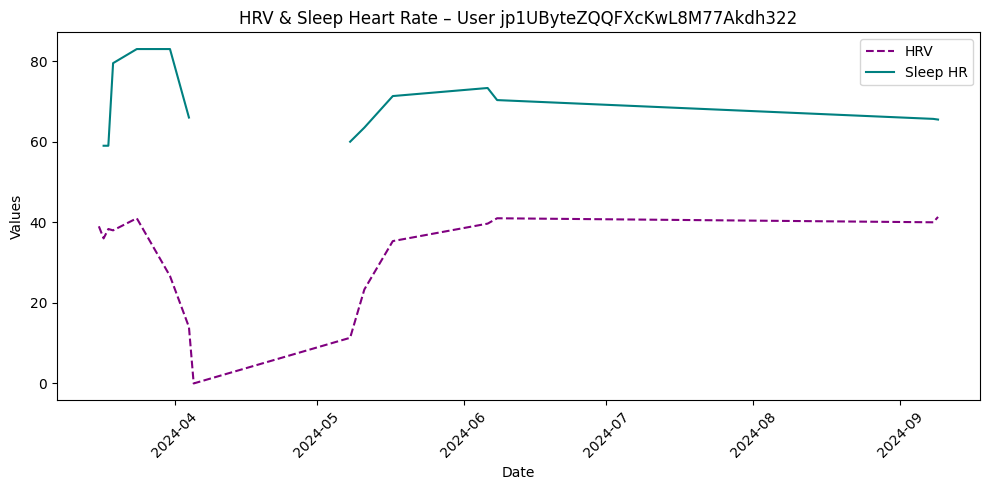

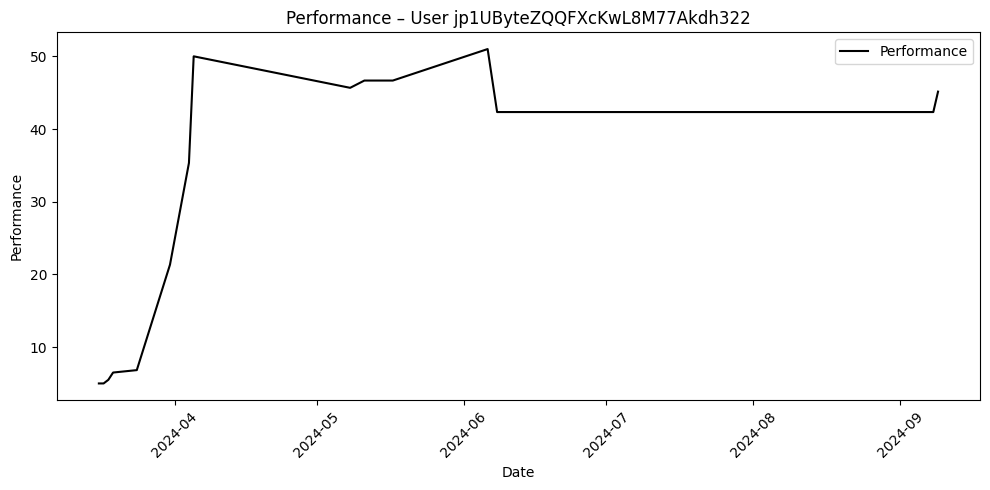

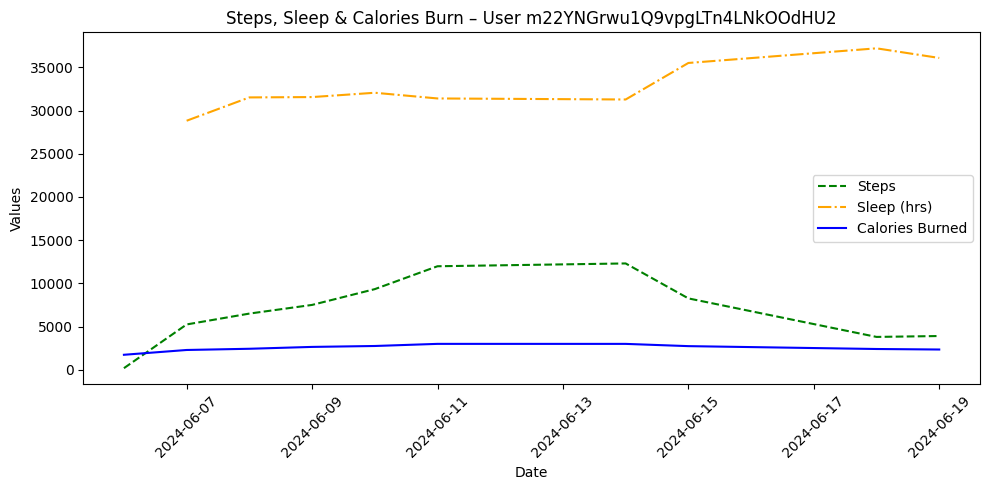

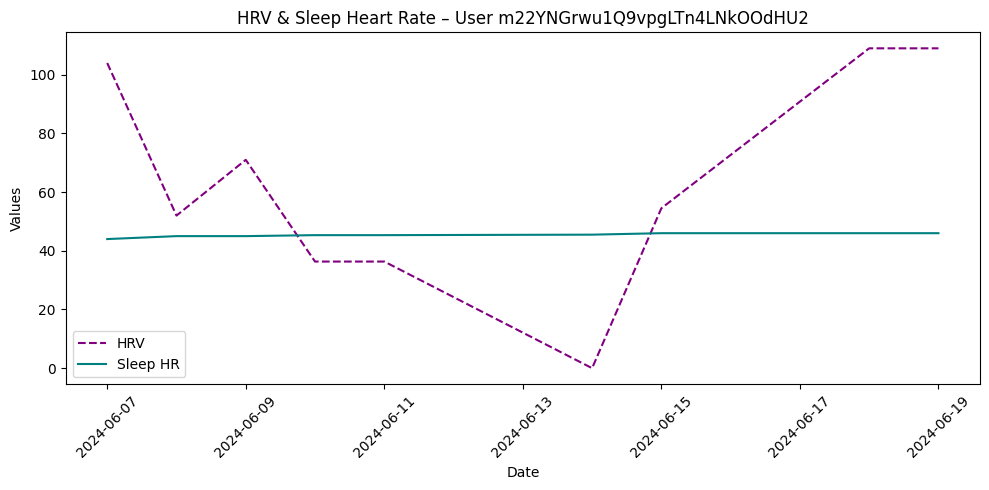

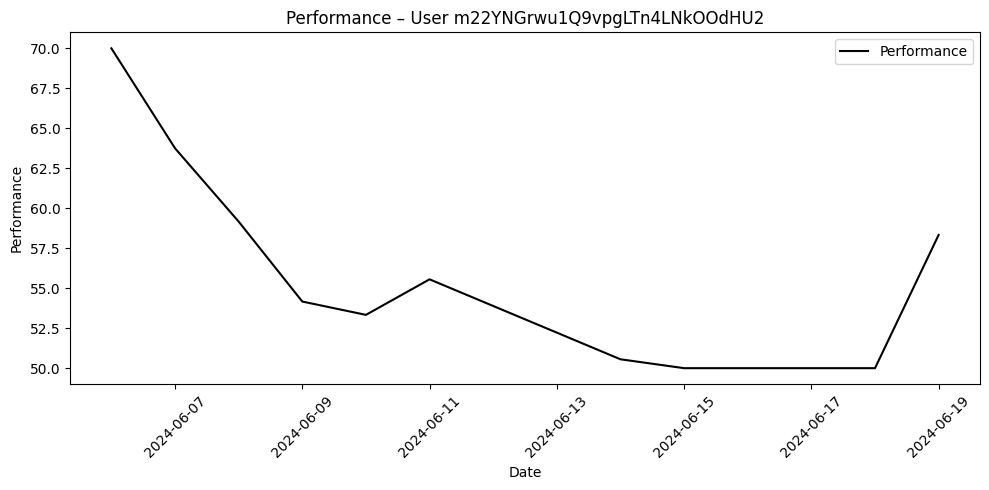

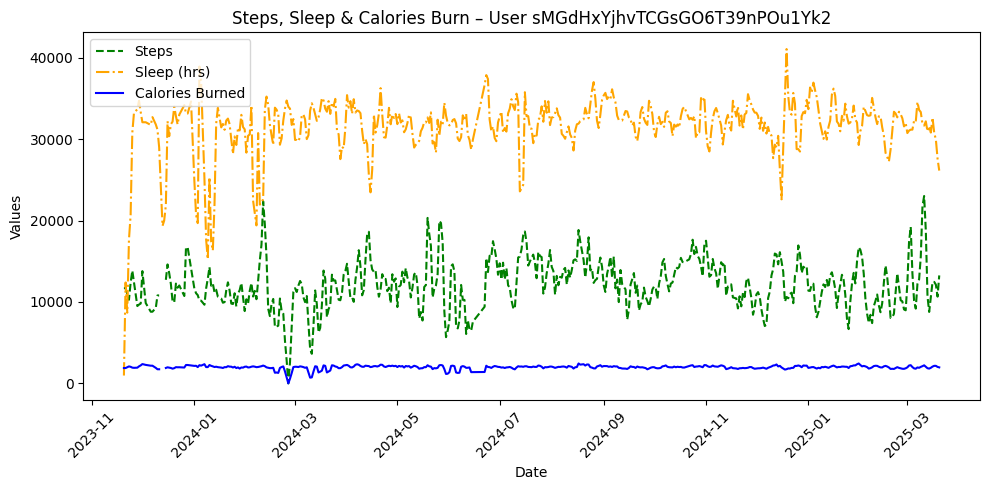

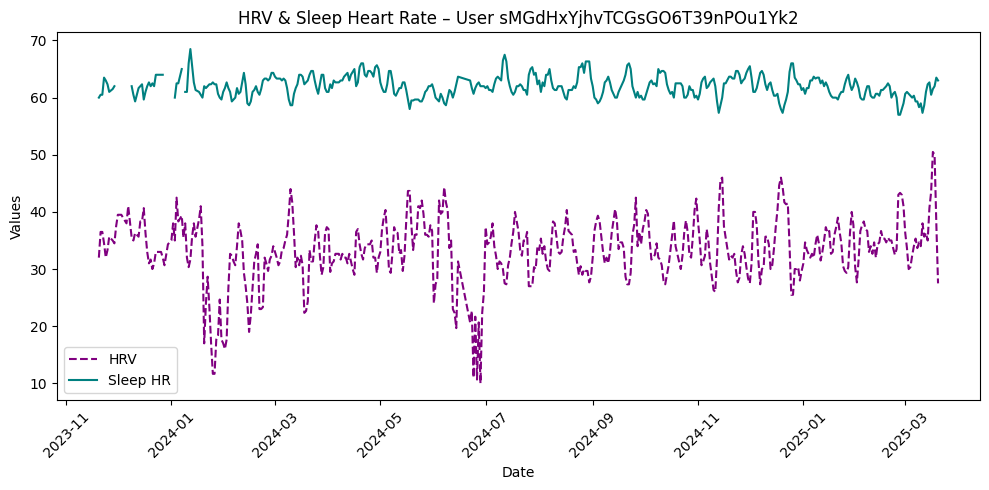

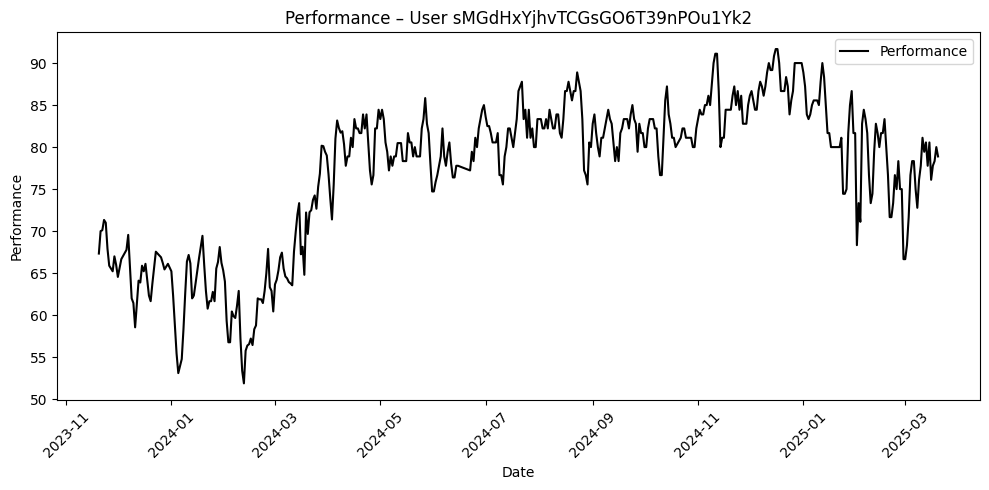

In [17]:
# Ensure datetime parsing
filtered_df = filtered_df.copy()
filtered_df['Date/Time'] = pd.to_datetime(filtered_df['Date/Time'])
filtered_df['Date'] = filtered_df['Date/Time'].dt.date

# Group users
users = filtered_df['User ID'].unique()
user_groups = filtered_df.groupby('User ID')

# Loop through each user
for user_id, group in user_groups:
    if len(group) < 10:
        continue

    # Group by date and average same-day values
    daily_group = group.groupby('Date')[[
        'Steps', 'Sleep', 'Callories Burn', 'HRV', 'Sleep Heart Rate', 'Performance'
    ]].mean().reset_index()

    # Sort and smooth with rolling average
    daily_group = daily_group.sort_values('Date')
    smooth = lambda col: daily_group[col].rolling(window=3, min_periods=1).mean()

    steps = smooth('Steps')
    sleep = smooth('Sleep')
    callories = smooth('Callories Burn')
    hrv = smooth('HRV')
    sleep_hr = smooth('Sleep Heart Rate')
    performance = smooth('Performance')

    # STEPS, SLEEP, CALLORIES BURN
    plt.figure(figsize=(10, 5))
    plt.plot(daily_group['Date'], steps, label='Steps', linestyle='--', color='green')
    plt.plot(daily_group['Date'], sleep, label='Sleep (hrs)', linestyle='-.', color='orange')
    plt.plot(daily_group['Date'], callories, label='Calories Burned', linestyle='-', color='blue')
    plt.title(f'Steps, Sleep & Calories Burn – User {user_id}')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # HRV & SLEEP HEART RATE
    plt.figure(figsize=(10, 5))
    plt.plot(daily_group['Date'], hrv, label='HRV', linestyle='--', color='purple')
    plt.plot(daily_group['Date'], sleep_hr, label='Sleep HR', linestyle='-', color='teal')
    plt.title(f'HRV & Sleep Heart Rate – User {user_id}')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # PERFORMANCE
    plt.figure(figsize=(10, 5))
    plt.plot(daily_group['Date'], performance, label='Performance', linestyle='-', color='black')
    plt.title(f'Performance – User {user_id}')
    plt.xlabel('Date')
    plt.ylabel('Performance')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()